### NOTEBOOK CONTENTS

- code to calculate of how much of the domain is $\Omega_A$ undersaturated

- would it be worth it to see how much is undersaturated, not including river areas (it won't matter too much...)?

#### Production of .nc documentation is found in: carbon_dev/PI_CARBON_PAPER/location_important_extracted_calculated_quantities.txt



In [15]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [16]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [17]:
import netCDF4 as nc
import numpy as np
import pickle
import matplotlib.pyplot as plt
import arrow




In [18]:
mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
csize = pickle.load(open('../pkls/cellsize_alg2.pkl', 'rb'))

print(np.shape(csize))

print(csize[0,250,250])
#plt.pcolormesh(csize[0,:,:])

print(mmask['e2t'][0,250,250]*mmask['e1t'][0,250,250]*mmask['e3t_0'][0,0,250,250])

(40, 898, 398)
222394.0735048354
222394.0735048354


In [19]:
start ='2015-01-01'
end ='2015-09-27'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

In [20]:
# mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# tmask = mmask['tmask'][0,:,:,:]
# #water - wher are cells water?
# water = np.where(tmask == 1)
# water_dom = (np.shape(tmask[water]))
# water_cells = (water_dom[0])

# water_vol = np.nansum(np.nansum(np.nansum(csize,axis = 0), axis = 1))
# #print(water_vol)
# #print(np.nansum(np.nansum(np.nansum(csize*tmask,axis = 0), axis = 1)))

# PI_under_0pt5 = np.zeros(365)
# PI_under_0pt6 = np.zeros(365)
# PI_under_0pt7 = np.zeros(365)
# PI_under_0pt8 = np.zeros(365)
# PI_under_0pt9 = np.zeros(365)
# PI_under_1pt0 = np.zeros(365)
# PI_under_1pt1 = np.zeros(365)
# PI_under_1pt2 = np.zeros(365)
# PI_under_1pt3 = np.zeros(365)
# PI_under_1pt4 = np.zeros(365)
# PI_under_1pt5 = np.zeros(365)

# for i in range(0,len(arrow_array)):
    
#     tdate = arrow_array[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI7_OmA_plus_'+ymd+'.nc')
#     domain_oma = t_pco2['model_output']['OmA'][:,:,:]

#     #0.5
#     #where is this water undersaturated below thres?
#     where_under = np.where((domain_oma<0.5) & ~(np.isnan(csize)) )
#     #mask while multiplying volume to get volumes of all cells where we are undersaturated
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     PI_under_0pt5[i] = perc_dom_under
    
#     #0.6 -comments same as for 0.5
#     where_under = np.where((domain_oma<0.6) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     PI_under_0pt6[i] = perc_dom_under

#     #0.7 -comments same as for 0.5
#     where_under = np.where((domain_oma<0.7) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     PI_under_0pt7[i] = perc_dom_under

#     #0.8 -comments same as for 0.5
#     where_under = np.where((domain_oma<0.8) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     PI_under_0pt8[i] = perc_dom_under
    
#         #0.9 -comments same as for 0.5
#     where_under = np.where((domain_oma<0.9) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     PI_under_0pt9[i] = perc_dom_under
    
#         #1 -comments same as for 0.5
#     where_under = np.where((domain_oma<1) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     PI_under_1pt0[i] = perc_dom_under
    
#         #1.1 -comments same as for 0.5
#     where_under = np.where((domain_oma<1.1) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     PI_under_1pt1[i] = perc_dom_under
    
#         #1.2 -comments same as for 0.5
#     where_under = np.where((domain_oma<1.2) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     PI_under_1pt2[i] = perc_dom_under
    
#         #1.3-comments same as for 0.5
#     where_under = np.where((domain_oma<1.3) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     PI_under_1pt3[i] = perc_dom_under
    
#         #1.4 -comments same as for 0.5
#     where_under = np.where((domain_oma<1.4) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     PI_under_1pt4[i] = perc_dom_under
    
#         #1.5 -comments same as for 0.5
#     where_under = np.where((domain_oma<1.5) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     PI_under_1pt5[i] = perc_dom_under

#     t_pco2.close()
    
# pickle.dump(PI_under_0pt5, open("./pkls/PI7_under_0pt5_vol.pkl", 'wb'))
# pickle.dump(PI_under_0pt6, open("./pkls/PI7_under_0pt6_vol.pkl", 'wb'))
# pickle.dump(PI_under_0pt7, open("./pkls/PI7_under_0pt7_vol.pkl", 'wb'))
# pickle.dump(PI_under_0pt8, open("./pkls/PI7_under_0pt8_vol.pkl", 'wb'))
# pickle.dump(PI_under_0pt9, open("./pkls/PI7_under_0pt9_vol.pkl", 'wb'))
# pickle.dump(PI_under_1pt0, open("./pkls/PI7_under_1pt0_vol.pkl", 'wb'))
# pickle.dump(PI_under_1pt1, open("./pkls/PI7_under_1pt1_vol.pkl", 'wb'))
# pickle.dump(PI_under_1pt2, open("./pkls/PI7_under_1pt2_vol.pkl", 'wb'))
# pickle.dump(PI_under_1pt3, open("./pkls/PI7_under_1pt3_vol.pkl", 'wb'))
# pickle.dump(PI_under_1pt4, open("./pkls/PI7_under_1pt4_vol.pkl", 'wb'))
# pickle.dump(PI_under_1pt5, open("./pkls/PI7_under_1pt5_vol.pkl", 'wb'))

In [21]:
# mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# tmask = mmask['tmask'][0,:,:,:]
# #water - wher are cells water?
# water = np.where(tmask == 1)
# water_dom = (np.shape(tmask[water]))
# water_cells = (water_dom[0])

# water_vol = np.nansum(np.nansum(np.nansum(csize,axis = 0), axis = 1))
# #print(water_vol)
# #print(np.nansum(np.nansum(np.nansum(csize*tmask,axis = 0), axis = 1)))

# BR_under_0pt5 = np.zeros(365)
# BR_under_0pt6 = np.zeros(365)
# BR_under_0pt7 = np.zeros(365)
# BR_under_0pt8 = np.zeros(365)
# BR_under_0pt9 = np.zeros(365)
# BR_under_1pt0 = np.zeros(365)
# BR_under_1pt1 = np.zeros(365)
# BR_under_1pt2 = np.zeros(365)
# BR_under_1pt3 = np.zeros(365)
# BR_under_1pt4 = np.zeros(365)
# BR_under_1pt5 = np.zeros(365)

# for i in range(0,len(arrow_array)):
    
#     tdate = arrow_array[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_'+ymd+'.nc')
#     domain_oma = t_pco2['model_output']['OmA'][:,:,:]

#     #0.5
#     #where is this water undersaturated below thres?
#     where_under = np.where((domain_oma<0.5) & ~(np.isnan(csize)) )
#     #mask while multiplying volume to get volumes of all cells where we are undersaturated
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     BR_under_0pt5[i] = perc_dom_under
    
#     #0.6 -comments same as for 0.5
#     where_under = np.where((domain_oma<0.6) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     BR_under_0pt6[i] = perc_dom_under

#     #0.7 -comments same as for 0.5
#     where_under = np.where((domain_oma<0.7) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     BR_under_0pt7[i] = perc_dom_under

#     #0.8 -comments same as for 0.5
#     where_under = np.where((domain_oma<0.8) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     BR_under_0pt8[i] = perc_dom_under
    
#         #0.9 -comments same as for 0.5
#     where_under = np.where((domain_oma<0.9) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     BR_under_0pt9[i] = perc_dom_under
    
#         #1 -comments same as for 0.5
#     where_under = np.where((domain_oma<1) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     BR_under_1pt0[i] = perc_dom_under
    
#         #1.1 -comments same as for 0.5
#     where_under = np.where((domain_oma<1.1) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     BR_under_1pt1[i] = perc_dom_under
    
#         #1.2 -comments same as for 0.5
#     where_under = np.where((domain_oma<1.2) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     BR_under_1pt2[i] = perc_dom_under
    
#         #1.3-comments same as for 0.5
#     where_under = np.where((domain_oma<1.3) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     BR_under_1pt3[i] = perc_dom_under
    
#         #1.4 -comments same as for 0.5
#     where_under = np.where((domain_oma<1.4) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     BR_under_1pt4[i] = perc_dom_under
    
#         #1.5 -comments same as for 0.5
#     where_under = np.where((domain_oma<1.5) & ~(np.isnan(csize)) )
#     domain_oma_vol_under = csize[where_under]
#     perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
#     BR_under_1pt5[i] = perc_dom_under

# pickle.dump(BR_under_0pt5, open("./pkls/BR3_under_0pt5_vol.pkl", 'wb'))
# pickle.dump(BR_under_0pt6, open("./pkls/BR3_under_0pt6_vol.pkl", 'wb'))
# pickle.dump(BR_under_0pt7, open("./pkls/BR3_under_0pt7_vol.pkl", 'wb'))
# pickle.dump(BR_under_0pt8, open("./pkls/BR3_under_0pt8_vol.pkl", 'wb'))
# pickle.dump(BR_under_0pt9, open("./pkls/BR3_under_0pt9_vol.pkl", 'wb'))
# pickle.dump(BR_under_1pt0, open("./pkls/BR3_under_1pt0_vol.pkl", 'wb'))
# pickle.dump(BR_under_1pt1, open("./pkls/BR3_under_1pt1_vol.pkl", 'wb'))
# pickle.dump(BR_under_1pt2, open("./pkls/BR3_under_1pt2_vol.pkl", 'wb'))
# pickle.dump(BR_under_1pt3, open("./pkls/BR3_under_1pt3_vol.pkl", 'wb'))
# pickle.dump(BR_under_1pt4, open("./pkls/BR3_under_1pt4_vol.pkl", 'wb'))
# pickle.dump(BR_under_1pt5, open("./pkls/BR3_under_1pt5_vol.pkl", 'wb'))

In [22]:
BR3_0pt5 = pickle.load(open('./pkls/BR3_under_0pt5_vol.pkl', 'rb'))
PI7_0pt5 = pickle.load(open('./pkls/PI7_under_0pt5_vol.pkl', 'rb'))
PI5_0pt5 = pickle.load(open('../pkls/PI5_under_0pt5_vol.pkl', 'rb'))

BR3_0pt6 = pickle.load(open('./pkls/BR3_under_0pt6_vol.pkl', 'rb'))
PI7_0pt6 = pickle.load(open('./pkls/PI7_under_0pt6_vol.pkl', 'rb'))
PI5_0pt6 = pickle.load(open('../pkls/PI5_under_0pt6_vol.pkl', 'rb'))

BR3_0pt7 = pickle.load(open('./pkls/BR3_under_0pt7_vol.pkl', 'rb'))
PI7_0pt7 = pickle.load(open('./pkls/PI7_under_0pt7_vol.pkl', 'rb'))
PI5_0pt7 = pickle.load(open('../pkls/PI5_under_0pt7_vol.pkl', 'rb'))

BR3_0pt8 = pickle.load(open('./pkls/BR3_under_0pt8_vol.pkl', 'rb'))
PI7_0pt8 = pickle.load(open('./pkls/PI7_under_0pt8_vol.pkl', 'rb'))
PI5_0pt8 = pickle.load(open('../pkls/PI5_under_0pt8_vol.pkl', 'rb'))

BR3_0pt9 = pickle.load(open('./pkls/BR3_under_0pt9_vol.pkl', 'rb'))
PI7_0pt9 = pickle.load(open('./pkls/PI7_under_0pt9_vol.pkl', 'rb'))
PI5_0pt9 = pickle.load(open('../pkls/PI5_under_0pt9_vol.pkl', 'rb'))

BR3_1pt0 = pickle.load(open('./pkls/BR3_under_1pt0_vol.pkl', 'rb'))
PI7_1pt0 = pickle.load(open('./pkls/PI7_under_1pt0_vol.pkl', 'rb'))
PI5_1pt0 = pickle.load(open('../pkls/PI5_under_1pt0_vol.pkl', 'rb'))

BR3_1pt1 = pickle.load(open('./pkls/BR3_under_1pt1_vol.pkl', 'rb'))
PI7_1pt1 = pickle.load(open('./pkls/PI7_under_1pt1_vol.pkl', 'rb'))
PI5_1pt1 = pickle.load(open('../pkls/PI5_under_1pt1_vol.pkl', 'rb'))

BR3_1pt2 = pickle.load(open('./pkls/BR3_under_1pt2_vol.pkl', 'rb'))
PI7_1pt2 = pickle.load(open('./pkls/PI7_under_1pt2_vol.pkl', 'rb'))
PI5_1pt2 = pickle.load(open('../pkls/PI5_under_1pt2_vol.pkl', 'rb'))

BR3_1pt3 = pickle.load(open('./pkls/BR3_under_1pt3_vol.pkl', 'rb'))
PI7_1pt3 = pickle.load(open('./pkls/PI7_under_1pt3_vol.pkl', 'rb'))
PI5_1pt3 = pickle.load(open('../pkls/PI5_under_1pt3_vol.pkl', 'rb'))

BR3_1pt4 = pickle.load(open('./pkls/BR3_under_1pt4_vol.pkl', 'rb'))
PI7_1pt4 = pickle.load(open('./pkls/PI7_under_1pt4_vol.pkl', 'rb'))
PI5_1pt4 = pickle.load(open('../pkls/PI5_under_1pt4_vol.pkl', 'rb'))

BR3_1pt5 = pickle.load(open('./pkls/BR3_under_1pt5_vol.pkl', 'rb'))
PI7_1pt5 = pickle.load(open('./pkls/PI7_under_1pt5_vol.pkl', 'rb'))
PI5_1pt5 = pickle.load(open('../pkls/PI5_under_1pt5_vol.pkl', 'rb'))

In [23]:
BR3_0pt5 = pickle.load(open('./pkls/BR3_under_0pt5_vol.pkl', 'rb'))
PI6_0pt5 = pickle.load(open('./pkls/PI6_under_0pt5_vol.pkl', 'rb'))
PI5_0pt5 = pickle.load(open('../pkls/PI5_under_0pt5_vol.pkl', 'rb'))

BR3_0pt6 = pickle.load(open('./pkls/BR3_under_0pt6_vol.pkl', 'rb'))
PI6_0pt6 = pickle.load(open('./pkls/PI6_under_0pt6_vol.pkl', 'rb'))
PI5_0pt6 = pickle.load(open('../pkls/PI5_under_0pt6_vol.pkl', 'rb'))

BR3_0pt7 = pickle.load(open('./pkls/BR3_under_0pt7_vol.pkl', 'rb'))
PI6_0pt7 = pickle.load(open('./pkls/PI6_under_0pt7_vol.pkl', 'rb'))
PI5_0pt7 = pickle.load(open('../pkls/PI5_under_0pt7_vol.pkl', 'rb'))

BR3_0pt8 = pickle.load(open('./pkls/BR3_under_0pt8_vol.pkl', 'rb'))
PI6_0pt8 = pickle.load(open('./pkls/PI6_under_0pt8_vol.pkl', 'rb'))
PI5_0pt8 = pickle.load(open('../pkls/PI5_under_0pt8_vol.pkl', 'rb'))

BR3_0pt9 = pickle.load(open('./pkls/BR3_under_0pt9_vol.pkl', 'rb'))
PI6_0pt9 = pickle.load(open('./pkls/PI6_under_0pt9_vol.pkl', 'rb'))
PI5_0pt9 = pickle.load(open('../pkls/PI5_under_0pt9_vol.pkl', 'rb'))

BR3_1pt0 = pickle.load(open('./pkls/BR3_under_1pt0_vol.pkl', 'rb'))
PI6_1pt0 = pickle.load(open('./pkls/PI6_under_1pt0_vol.pkl', 'rb'))
PI5_1pt0 = pickle.load(open('../pkls/PI5_under_1pt0_vol.pkl', 'rb'))

BR3_1pt1 = pickle.load(open('./pkls/BR3_under_1pt1_vol.pkl', 'rb'))
PI6_1pt1 = pickle.load(open('./pkls/PI6_under_1pt1_vol.pkl', 'rb'))
PI5_1pt1 = pickle.load(open('../pkls/PI5_under_1pt1_vol.pkl', 'rb'))

BR3_1pt2 = pickle.load(open('./pkls/BR3_under_1pt2_vol.pkl', 'rb'))
PI6_1pt2 = pickle.load(open('./pkls/PI6_under_1pt2_vol.pkl', 'rb'))
PI5_1pt2 = pickle.load(open('../pkls/PI5_under_1pt2_vol.pkl', 'rb'))

BR3_1pt3 = pickle.load(open('./pkls/BR3_under_1pt3_vol.pkl', 'rb'))
PI6_1pt3 = pickle.load(open('./pkls/PI6_under_1pt3_vol.pkl', 'rb'))
PI5_1pt3 = pickle.load(open('../pkls/PI5_under_1pt3_vol.pkl', 'rb'))

BR3_1pt4 = pickle.load(open('./pkls/BR3_under_1pt4_vol.pkl', 'rb'))
PI6_1pt4 = pickle.load(open('./pkls/PI6_under_1pt4_vol.pkl', 'rb'))
PI5_1pt4 = pickle.load(open('../pkls/PI5_under_1pt4_vol.pkl', 'rb'))

BR3_1pt5 = pickle.load(open('./pkls/BR3_under_1pt5_vol.pkl', 'rb'))
PI6_1pt5 = pickle.load(open('./pkls/PI6_under_1pt5_vol.pkl', 'rb'))
PI5_1pt5 = pickle.load(open('../pkls/PI5_under_1pt5_vol.pkl', 'rb'))

In [24]:
BR3_1pt5 = pickle.load(open('./pkls/BR3_under_1pt5_vol.pkl', 'rb'))
BR3old_1pt5 = pickle.load(open('../KEY_OMA/domain_undersat_pickles/BR_under_1pt5_vol.pkl', 'rb'))

print(BR3old_1pt5[200:220])
print(BR3_1pt5[200:220])

[0.78752847 0.77938705 0.77024722 0.76288154 0.75556759 0.75135548
 0.74879787 0.74980811 0.75464405 0.76432393 0.77599677 0.78485729
 0.79138827 0.79643015 0.79947535 0.7994501  0.79836092 0.79916393
 0.79789365 0.79554472]
[0.88298339 0.87893411 0.87397071 0.87125535 0.86867253 0.86834751
 0.86868705 0.87052523 0.87360378 0.87941938 0.88771786 0.89449533
 0.89958831 0.90275835 0.90475726 0.9045136  0.90320083 0.90356962
 0.903047   0.90232525]


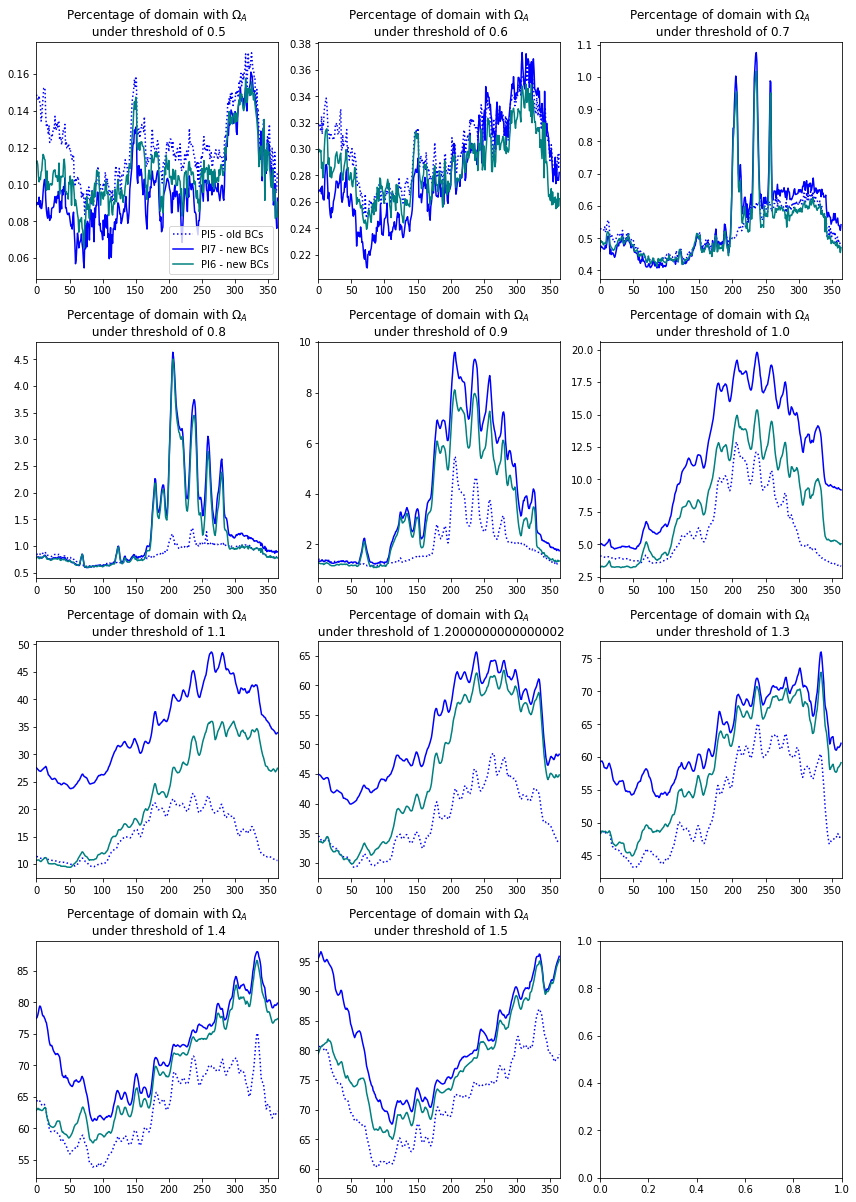

In [25]:
## plotting

BR3_thres = [BR3_0pt5, BR3_0pt6, BR3_0pt7, BR3_0pt8, BR3_0pt9, BR3_1pt0,\
            BR3_1pt1, BR3_1pt2, BR3_1pt3, BR3_1pt4, BR3_1pt5]

PI5_thres = [PI5_0pt5, PI5_0pt6, PI5_0pt7, PI5_0pt8, PI5_0pt9, PI5_1pt0,\
            PI5_1pt1, PI5_1pt2, PI5_1pt3, PI5_1pt4, PI5_1pt5]

PI7_thres = [PI7_0pt5, PI7_0pt6, PI7_0pt7, PI7_0pt8, PI7_0pt9, PI7_1pt0,\
            PI7_1pt1, PI7_1pt2, PI7_1pt3, PI7_1pt4, PI7_1pt5]

PI6_thres = [PI6_0pt5, PI6_0pt6, PI6_0pt7, PI6_0pt8, PI6_0pt9, PI6_1pt0,\
            PI6_1pt1, PI6_1pt2, PI6_1pt3, PI6_1pt4, PI6_1pt5]

fact = 0.8
fig, axs = plt.subplots(4,3, figsize=(15*fact, 21*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,11):
    axs[i].plot(np.arange(0,365,1),
                PI5_thres[i]*100, color = 'b',linestyle = ':', label = 'PI5 - old BCs')
    axs[i].plot(np.arange(0,365,1),
                PI7_thres[i]*100, color = 'b',linestyle = '-', label = 'PI7 - new BCs')  
    axs[i].plot(np.arange(0,365,1),
                PI6_thres[i]*100, color = 'teal',linestyle = '-', label = 'PI6 - new BCs')  
    axs[i].set_title(f'Percentage of domain with $\Omega_A$ \n under threshold of {0.5 + 0.1*i}')
        #axs[1].plot(np.arange(0,365,1),sorted_discharge_1946_1951[1,c,y,:], color = cols[c],linestyle = ':')}
    axs[i].set_xlim([0,365])
#plot one to one line
axs[0].legend(loc = 'best')

plt.tight_layout()

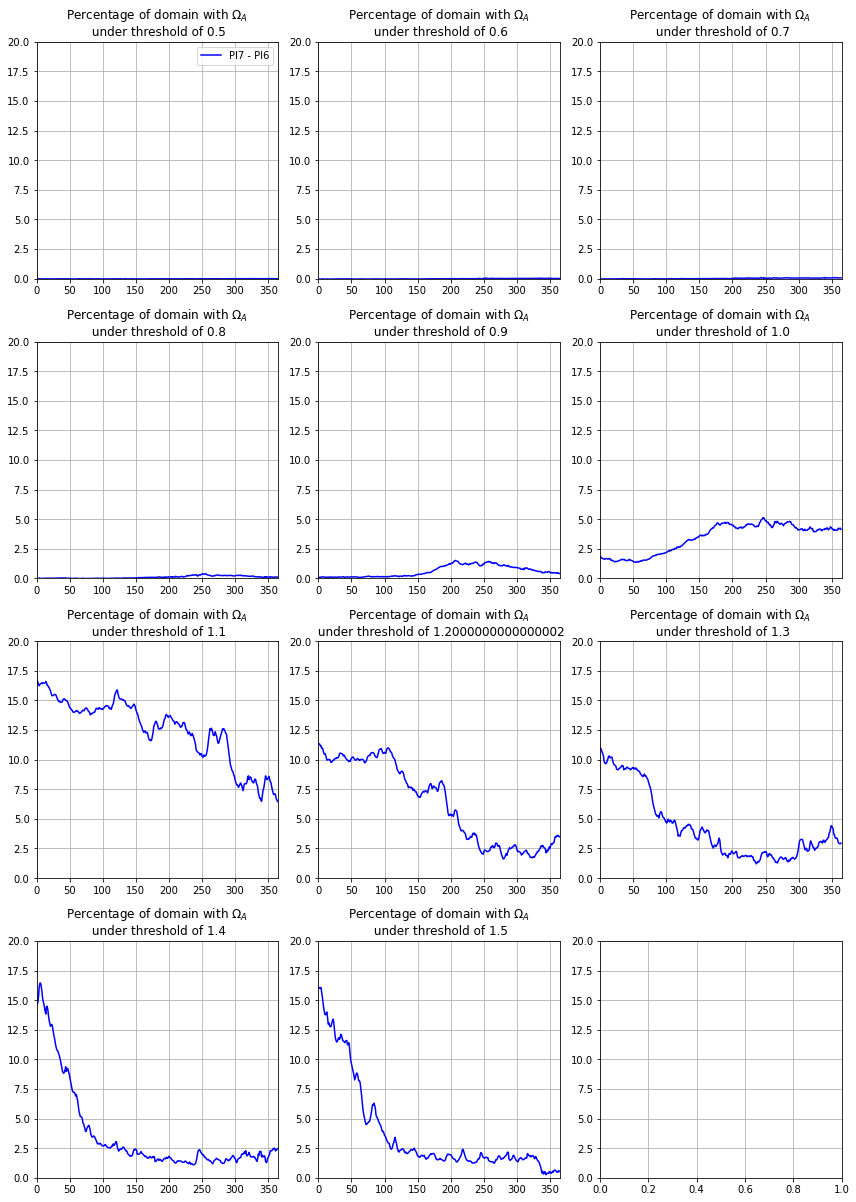

In [31]:
## plotting

BR3_thres = [BR3_0pt5, BR3_0pt6, BR3_0pt7, BR3_0pt8, BR3_0pt9, BR3_1pt0,\
            BR3_1pt1, BR3_1pt2, BR3_1pt3, BR3_1pt4, BR3_1pt5]

PI5_thres = [PI5_0pt5, PI5_0pt6, PI5_0pt7, PI5_0pt8, PI5_0pt9, PI5_1pt0,\
            PI5_1pt1, PI5_1pt2, PI5_1pt3, PI5_1pt4, PI5_1pt5]

PI7_thres = [PI7_0pt5, PI7_0pt6, PI7_0pt7, PI7_0pt8, PI7_0pt9, PI7_1pt0,\
            PI7_1pt1, PI7_1pt2, PI7_1pt3, PI7_1pt4, PI7_1pt5]

PI6_thres = [PI6_0pt5, PI6_0pt6, PI6_0pt7, PI6_0pt8, PI6_0pt9, PI6_1pt0,\
            PI6_1pt1, PI6_1pt2, PI6_1pt3, PI6_1pt4, PI6_1pt5]

fact = 0.8
fig, axs = plt.subplots(4,3, figsize=(15*fact, 21*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,11):
#     axs[i].plot(np.arange(0,365,1),
#                 PI5_thres[i]*100, color = 'b',linestyle = ':', label = 'PI5 - old BCs')
    axs[i].plot(np.arange(0,365,1),
                PI7_thres[i]*100-PI6_thres[i]*100, color = 'b',linestyle = '-', label = 'PI7 - PI6')  
#     axs[i].plot(np.arange(0,365,1),
#                 PI6_thres[i]*100, color = 'teal',linestyle = '-', label = 'PI6 - new BCs')  
    axs[i].set_title(f'Percentage of domain with $\Omega_A$ \n under threshold of {0.5 + 0.1*i}')
        #axs[1].plot(np.arange(0,365,1),sorted_discharge_1946_1951[1,c,y,:], color = cols[c],linestyle = ':')}
    axs[i].set_xlim([0,365])
#plot one to one line
axs[0].legend(loc = 'best')

for i in range(0,12):
    axs[i].grid()
    axs[i].set_ylim([0,20])
plt.tight_layout()

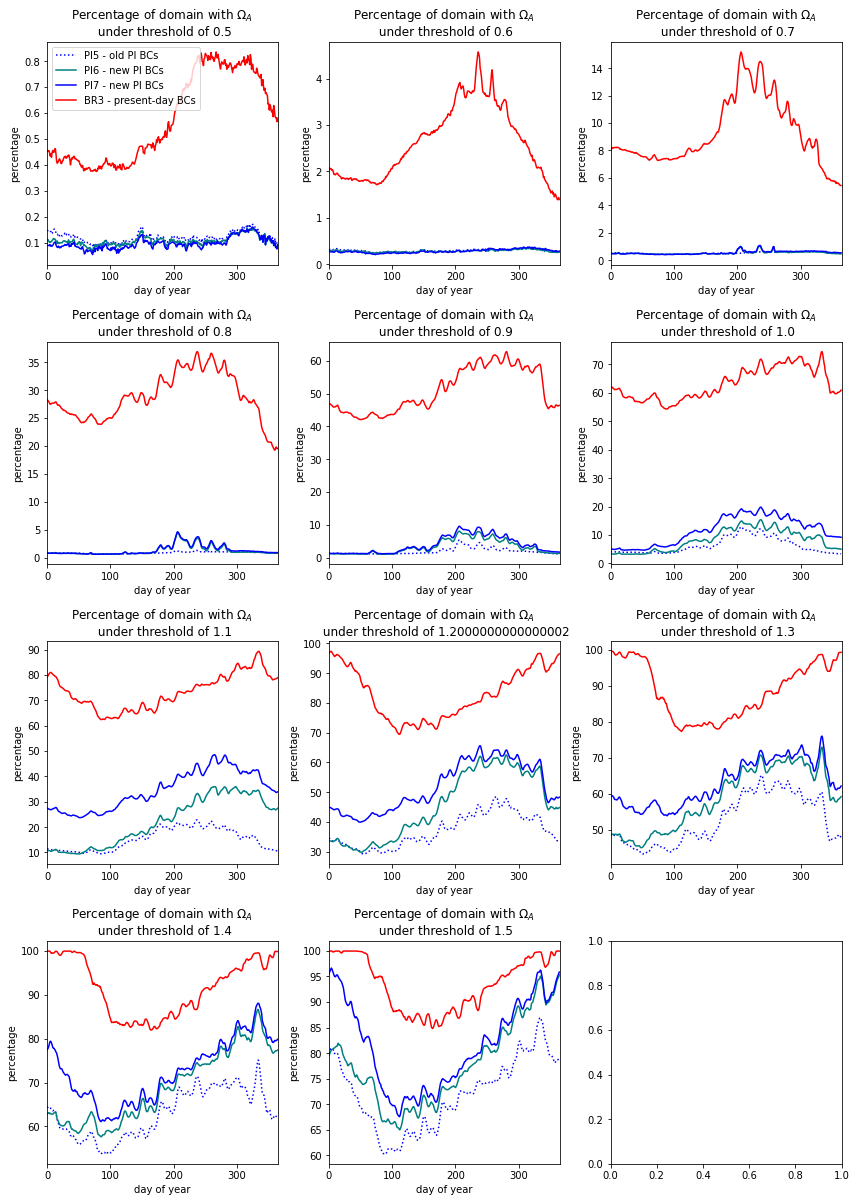

In [27]:
## plotting

BR3_thres = [BR3_0pt5, BR3_0pt6, BR3_0pt7, BR3_0pt8, BR3_0pt9, BR3_1pt0,\
            BR3_1pt1, BR3_1pt2, BR3_1pt3, BR3_1pt4, BR3_1pt5]

PI5_thres = [PI5_0pt5, PI5_0pt6, PI5_0pt7, PI5_0pt8, PI5_0pt9, PI5_1pt0,\
            PI5_1pt1, PI5_1pt2, PI5_1pt3, PI5_1pt4, PI5_1pt5]

PI6_thres = [PI6_0pt5, PI6_0pt6, PI6_0pt7, PI6_0pt8, PI6_0pt9, PI6_1pt0,\
            PI6_1pt1, PI6_1pt2, PI6_1pt3, PI6_1pt4, PI6_1pt5]


fact = 0.8
fig, axs = plt.subplots(4,3, figsize=(15*fact, 21*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,11):
    axs[i].plot(np.arange(0,365,1),
                PI5_thres[i]*100, color = 'b',linestyle = ':', label = 'PI5 - old PI BCs')
    axs[i].plot(np.arange(0,365,1),
                PI6_thres[i]*100, color = 'teal',linestyle = '-', label = 'PI6 - new PI BCs')        

    axs[i].plot(np.arange(0,365,1),
                PI7_thres[i]*100, color = 'b',linestyle = '-', label = 'PI7 - new PI BCs')        
    axs[i].plot(np.arange(0,365,1),
                BR3_thres[i]*100, color = 'r',linestyle = '-', label = 'BR3 - present-day BCs')        

    axs[i].set_title(f'Percentage of domain with $\Omega_A$ \n under threshold of {0.5 + 0.1*i}')
        #axs[1].plot(np.arange(0,365,1),sorted_discharge_1946_1951[1,c,y,:], color = cols[c],linestyle = ':')}
    axs[i].set_xlim([0,365])
    axs[i].set_xlabel('day of year')
    axs[i].set_ylabel('percentage')
#plot one to one line
axs[0].legend(loc = 'best')
plt.tight_layout()